In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 6.0) 

In [5]:
com_path = '../data/com_training.txt'
df = pd.read_csv(com_path, delimiter=';', parse_dates=['time_interval_begin'], dtype={'link_ID': object})

In [6]:
df.head()

,link_ID,date,time_interval_begin,travel_time,imputation1
0,3377906280028510514,2017-03-01,2017-03-01 06:00:00,1.656108,True
1,3377906280028510514,2017-03-01,2017-03-01 06:02:00,1.661686,True
2,3377906280028510514,2017-03-01,2017-03-01 06:04:00,1.667200,True
3,3377906280028510514,2017-03-01,2017-03-01 06:06:00,1.672652,True
4,3377906280028510514,2017-03-01,2017-03-01 06:08:00,1.678040,True


### 基本的时间特征有很多，包括minute_of_hour,hour_of_day,day_of_month,day_of_week,month_of_year

In [7]:
# 思路，可以先将所有的时间特征生成出来，然后查看每个特征的box图
df['minute_of_hour'] = df.time_interval_begin.dt.minute

In [8]:
df['hour_of_day'] = df.time_interval_begin.dt.hour
df['day_of_month'] = df.time_interval_begin.dt.day
df['week_of_year'] = df.time_interval_begin.dt.weekofyear
df['day_of_week'] = df.time_interval_begin.dt.weekday
df['month_of_year'] = df.time_interval_begin.dt.month

In [16]:
df.loc[df['date'].isin(
        ['2017-04-02', '2017-04-03', '2017-04-04', '2017-04-29', '2017-04-30', '2017-05-01',
         '2017-05-28', '2017-05-29', '2017-05-30']), 'vacation'] = 1
df.loc[~df['date'].isin(
    ['2017-04-02', '2017-04-03', '2017-04-04', '2017-04-29', '2017-04-30', '2017-05-01',
     '2017-05-28', '2017-05-29', '2017-05-30']), 'vacation'] = 0

In [10]:
df.head()

,link_ID,date,time_interval_begin,travel_time,imputation1,minute_of_hour,hour_of_day,day_of_month,week_of_year,day_of_week,month_of_year
0,3377906280028510514,2017-03-01,2017-03-01 06:00:00,1.656108,True,0,6,1,9,2,3
1,3377906280028510514,2017-03-01,2017-03-01 06:02:00,1.661686,True,2,6,1,9,2,3
2,3377906280028510514,2017-03-01,2017-03-01 06:04:00,1.667200,True,4,6,1,9,2,3
3,3377906280028510514,2017-03-01,2017-03-01 06:06:00,1.672652,True,6,6,1,9,2,3
4,3377906280028510514,2017-03-01,2017-03-01 06:08:00,1.678040,True,8,6,1,9,2,3


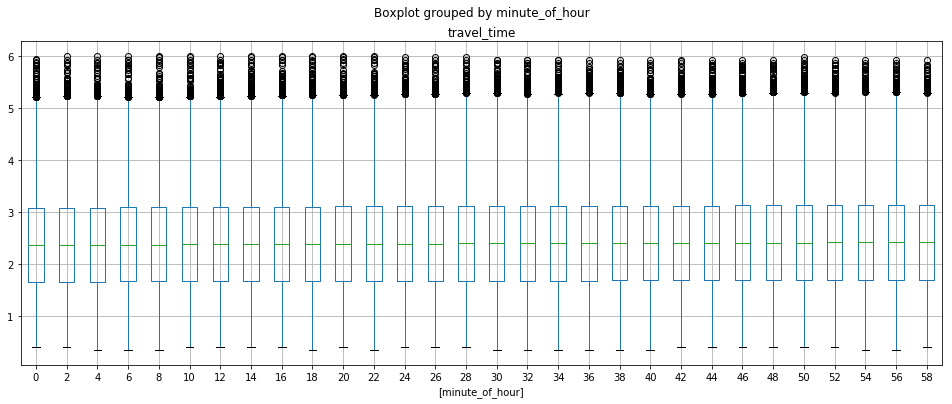

In [13]:
df.boxplot(by=['minute_of_hour'],column='travel_time')
plt.show()

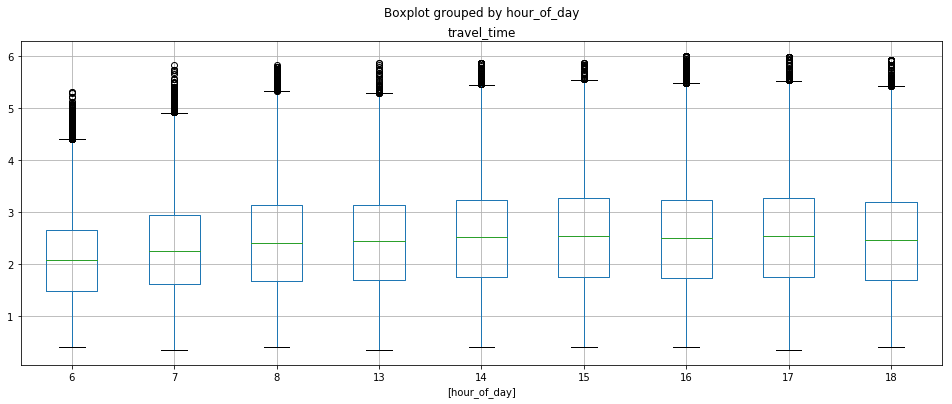

In [14]:
# 看图感觉minute_of_hour这个特征没什么用，趋势比较平稳
df.boxplot(by=['hour_of_day'],column='travel_time')
plt.show()

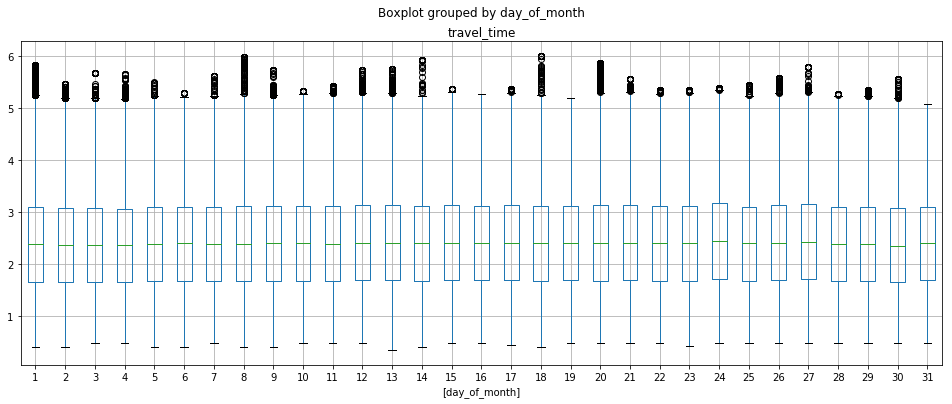

In [17]:
# 感觉hour_of_day这个特征明显有用
df.boxplot(by=['day_of_month'],column='travel_time')
plt.show()

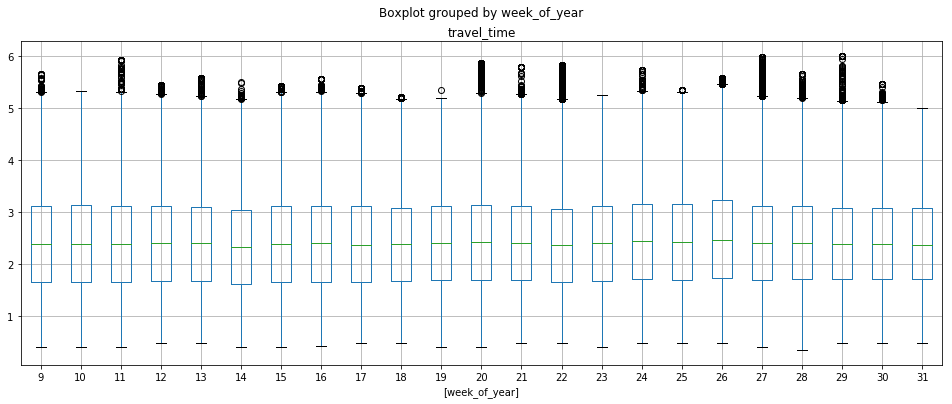

In [18]:
# day_of_month 辨识度不是很高
df.boxplot(by=['week_of_year'],column='travel_time')
plt.show()

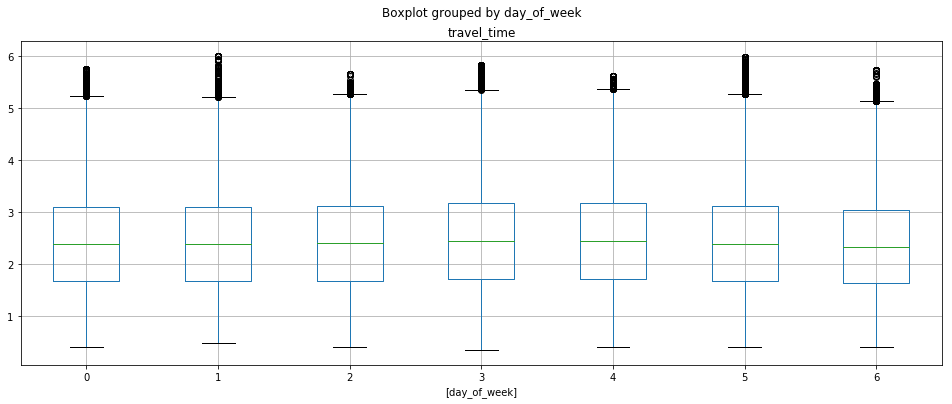

In [19]:
# 这个 week_of_year 也很一般
df.boxplot(by=['day_of_week'],column='travel_time')
plt.show()

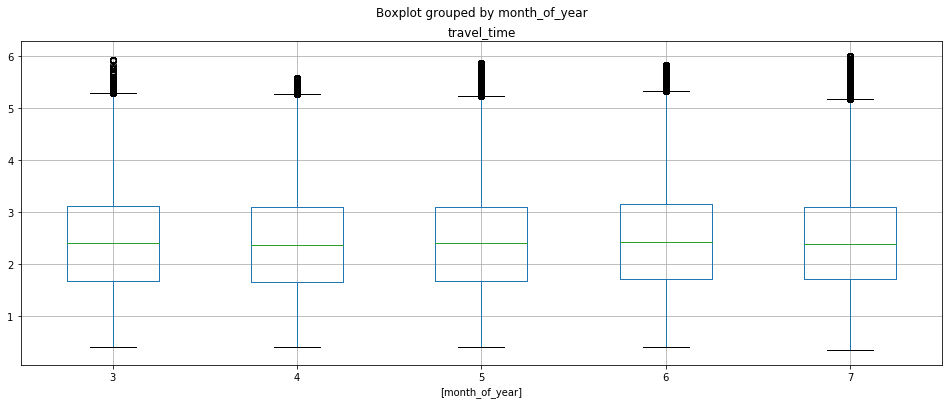

In [20]:
# day_of_week 这个特征好像有点趋势，其中0，1，2可以分为1类，3，4可以分为1类，5，6可以分为1类
df.boxplot(by=['month_of_year'],column='travel_time')
plt.show()

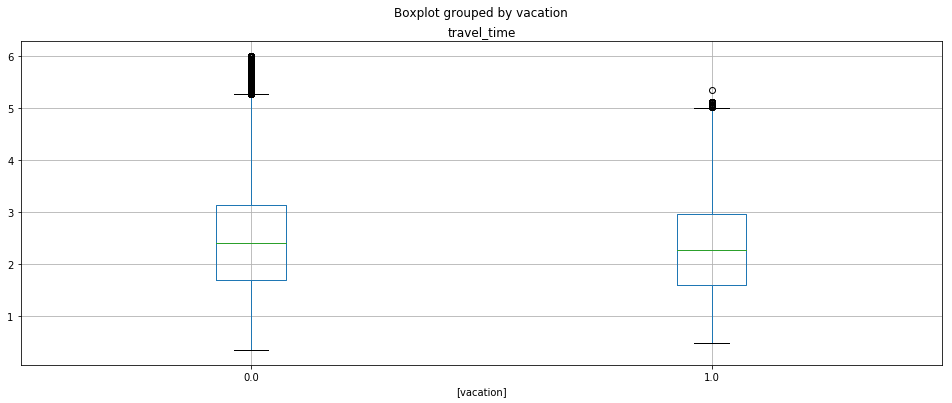

In [21]:
# 因为要预测所有的7月份数据，这个特征在训练数据中出现过，但是并未在测试数据中出现过，暂且不考虑这个特征
df.boxplot(by=['vacation'],column='travel_time')
plt.show()

In [23]:
# 是不是假期明显是一个显著特征 vacation

df1 = df.loc[df['time_interval_begin'].dt.month.isin([3, 4, 5, 6])].groupby(['hour_of_day', 'day_of_week'])[
    'travel_time'].mean()

In [24]:
df1.head()

hour_of_day  day_of_week
6            0              2.091309
             1              2.086897
             2              2.093532
             3              2.097618
             4              2.099071
Name: travel_time, dtype: float64

In [25]:
type(df1)

pandas.core.series.Series

In [26]:
# 此时的df1是一个series,其中index是多级索引，hour_of_day和day_of_week的组合
# unstack 将数据从‘花括号结构’ 变成‘表格结构’
df1.unstack()

day_of_week,0,1,2,3,4,5,6
hour_of_day,,,,,,,
6,2.091309,2.086897,2.093532,2.097618,2.099071,2.102036,2.083103
7,2.337010,2.332595,2.351159,2.358261,2.353981,2.215590,2.164540
8,2.494156,2.442511,2.484212,2.499982,2.512851,2.328392,2.265641
13,2.384912,2.392054,2.406759,2.425709,2.442642,2.494538,2.449334
14,2.470939,2.468294,2.475681,2.532083,2.532363,2.551064,2.489479
15,2.504828,2.489695,2.491236,2.568769,2.571133,2.576441,2.502780
16,2.452957,2.465215,2.459244,2.554932,2.527518,2.543517,2.465060
17,2.506778,2.496600,2.515498,2.597552,2.578849,2.502155,2.412193
18,2.440031,2.415864,2.446886,2.542337,2.564607,2.459249,2.360648


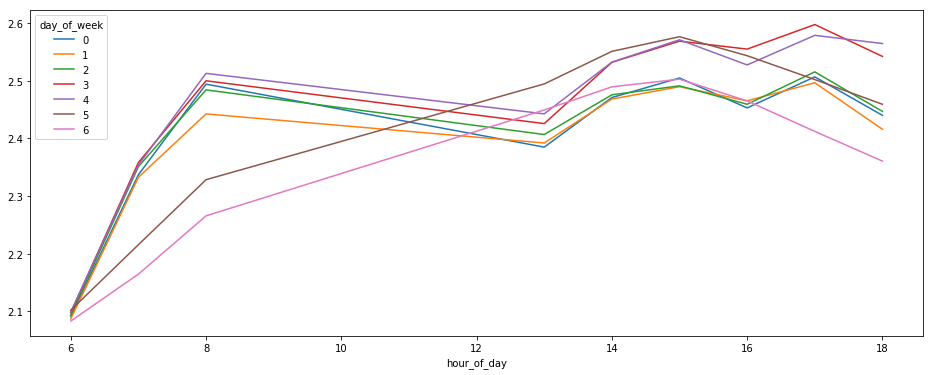

In [27]:
df1.unstack().plot()

In [ ]:
# 可以对week 和 hour 进行聚类之后在处理